# <font color = 'red'>Gráficos Estatísticos com Seaborn</font>

In [21]:
# Caso não tenha a biblioteca, basta instalar
!pip install Seaborn

In [1]:
# Importando as Bibliotecas
import matplotlib.pyplot as plt # Gerador de gráficos
import seaborn as sns # Gerador de gráficos
import warnings # Importando biblioteca de erros
warnings.filterwarnings('ignore') # Ignorando erros
from scipy import stats # Biblioteca ML e pacote de estatística
import numpy as np # Funções matemáticas
%matplotlib inline # Graficos gerados na linha

UsageError: unrecognized arguments: # Graficos gerados na linha


In [2]:
# Versao da biblioteca
sns.__version__

'0.11.1'

In [3]:
# Datasets já inclusos no seabron
sns.get_dataset_names()
# Alguns deles são bem conhecidos, como o iris

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
# carregando um dataset
iris = sns.load_dataset("iris")

In [5]:
# Tipo de dado devolvido
type(iris)

pandas.core.frame.DataFrame

In [6]:
# Primeiras linhas
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Perceba que o dataset importado diz respeito a tipos de rosas.
Vamos entender um pouco da sua estrutura.
* sepal_length -> Comprimento da Sépala
* sepal_width -> Largura da Sépala
* petal_length -> Comprimento da Pétala
* petal_width -> Altura da Pétala
* species -> Especies de rosa


In [7]:
# Resume estatístico das variáveis numéricas
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Colunas do DataFrame
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## <font color='red'>Construindo Gráficos Estatísticos</font>

## <font color='yellow'> Gráficos de Distribuição </font>

### Histograma com estimativa de densidade de kernel -  Distribuição univariada

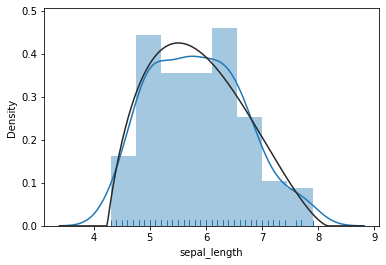

In [9]:
sns.distplot(iris.sepal_length, rug= True, fit = stats.gausshyper);
# rug -> linha de distribuição inferior
# stats.gausshyper curva de gaus

### Scatterplot - Distribuição bivariada

Nesse vizual é possível realizar dois tipos de analises:
* Distribuição normal de duas variáveis
* A correlação entre essas variáveis

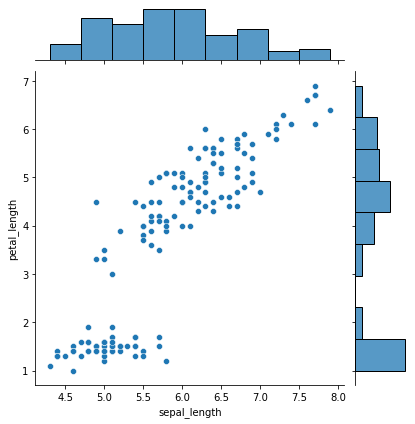

In [10]:
sns.jointplot(data = iris, x = "sepal_length", y = "petal_length");

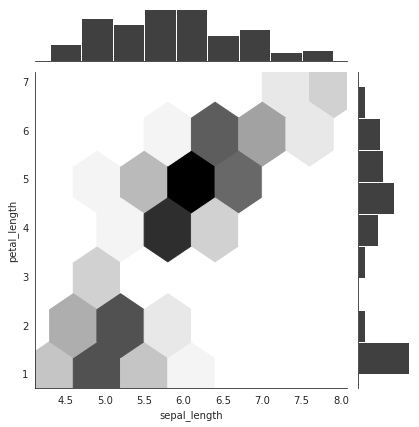

In [11]:
# criando um grafico um pouco mais trabalhado
with sns.axes_style("white"): #util quando temos datasets muito grandes
    sns.jointplot(data = iris, x = "sepal_length", y = "petal_length", kind="hex",color="k");

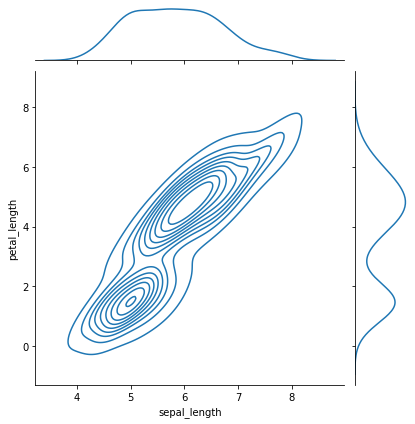

In [12]:
sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind="kde");

### Gerando varios graficos juntos

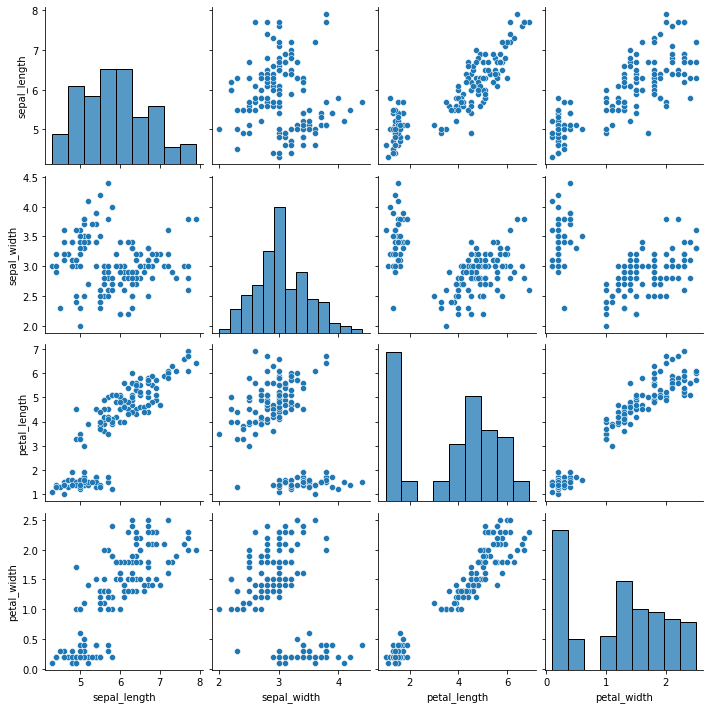

In [13]:
sns.pairplot(iris);

## <font color='yellow'> Gráficos de Distribuição Linear </font>

In [14]:
# Carregando outro dataset - tips
tips = sns.load_dataset("tips")

In [15]:
type(tips)

pandas.core.frame.DataFrame

In [17]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [18]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Perceba que o dataset importado diz respeito a pagamento de contas.
Vamos entender um pouco da sua estrutura.
* total_bill -> Valor da conta
* tip -> Gorgeta
* sex -> Sexo
* smoke -> Mesa fumante
* time -> Almoço ou Jantar
* size -> Nº pessoas

In [19]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Construindo gráfico de regrassão linear

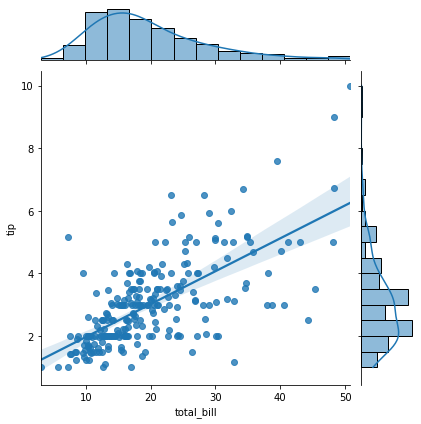

In [20]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg");

### Regrassão Linar (utiliza 95% de intervalo de confiança por padrão)
### Variável dependente -> tip
### Variável independente -> total_bill

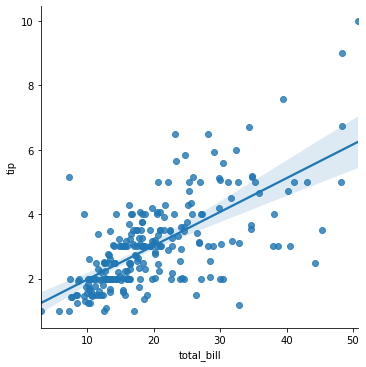

In [21]:
sns.lmplot(data=tips, x="total_bill", y="tip");

Alterando a variável independente

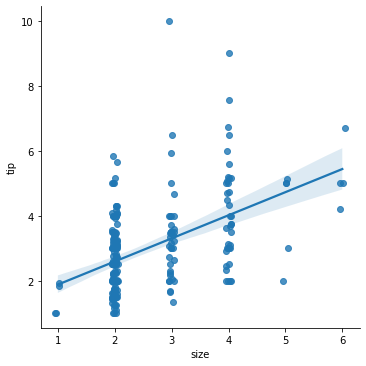

In [22]:
sns.lmplot(data=tips, x="size", y="tip", x_jitter= .05);
# x_jitte agrupa os pontos em um determivando intervalo

### Vizualizando o nivel de erro para cada um dos pontos da linha de regressão

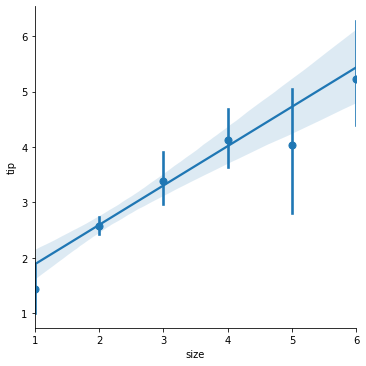

In [23]:
sns.lmplot(data=tips, x="size", y="tip", x_estimator=np.mean);
# Utilizar o estimador e utilizar a media do numpy

### Vamos vizualiar um gráfico de regressão para variáveis que não tem relação?

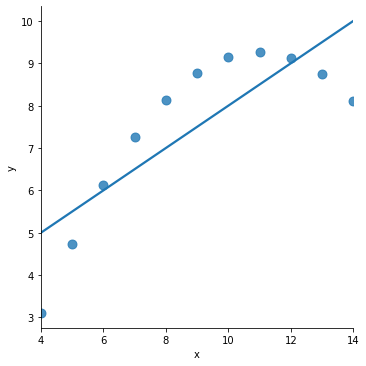

In [24]:
# Carregando dataset anscombe
anscombe = sns.load_dataset("anscombe")

#Relacionamento não-linear
sns.lmplot(data=anscombe.query("dataset == 'II'"), x="x", y="y", ci=None, scatter_kws={"s":80});

### Podemos ajustar os parâmetros para se adequarem a curva

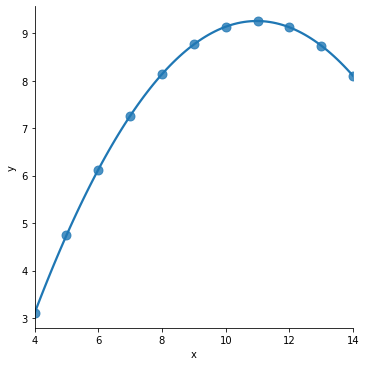

In [25]:
sns.lmplot(data=anscombe.query("dataset == 'II'"), x="x", y="y",order=2, ci=None, scatter_kws={"s":80});

### <font color='green'>Perceba que nesse caso não existirá relação linear.</font>

### Vizualizando outlies

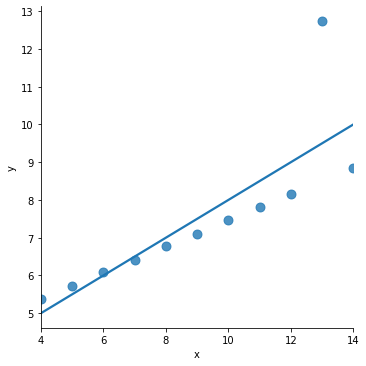

In [26]:
sns.lmplot(data=anscombe.query("dataset == 'III'"), x="x", y="y", ci=None, scatter_kws={"s":80});

### Usando o lowess smoother para variáveis com relacionamento não linear

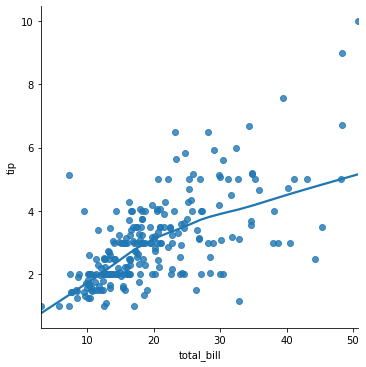

In [27]:
sns.lmplot(data=tips, x="total_bill", y="tip",lowess=True)

### Usando mai de 2 variáveis

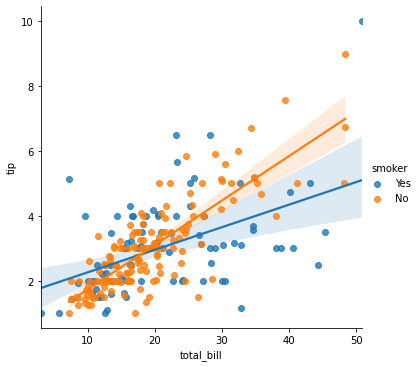

In [28]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker");

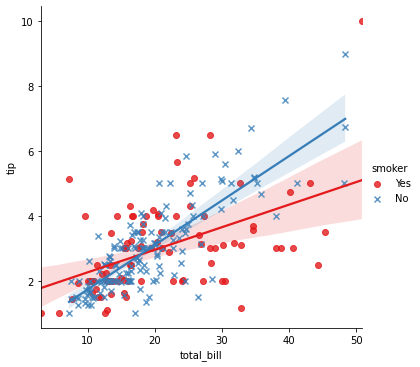

In [29]:
# Diferenciando as variaveis vizualmente
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", markers=['o','x'], palette="Set1");

#### Na vizualização acima criamos uma regressão para a relação de valor da conta e gorjeta.
#### Agora colorimos os que são ou não fumantes e vemos se as 3 variáveis possuem relação linear

### Dividindo a área de desenho

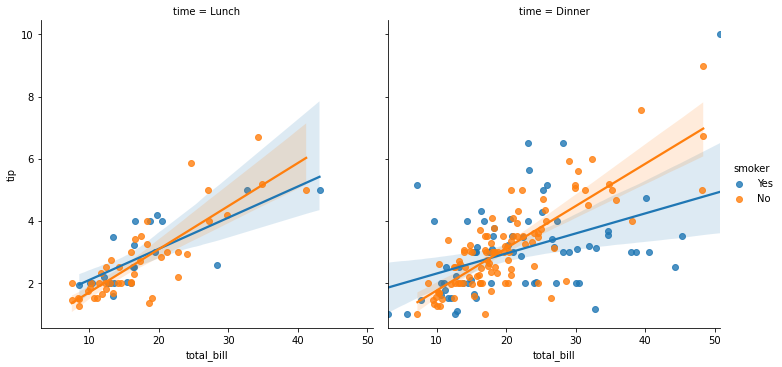

In [30]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", col="time");

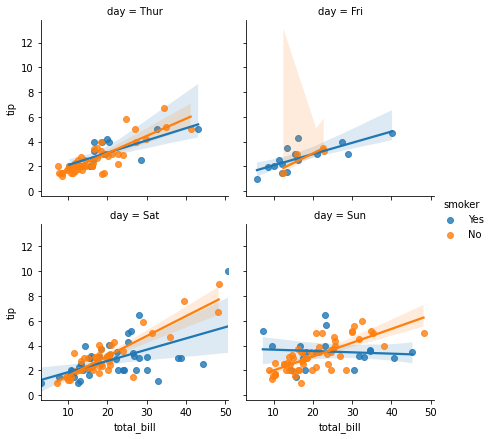

In [31]:
# 4 ainda menor
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", col="day", col_wrap=2, size=3);

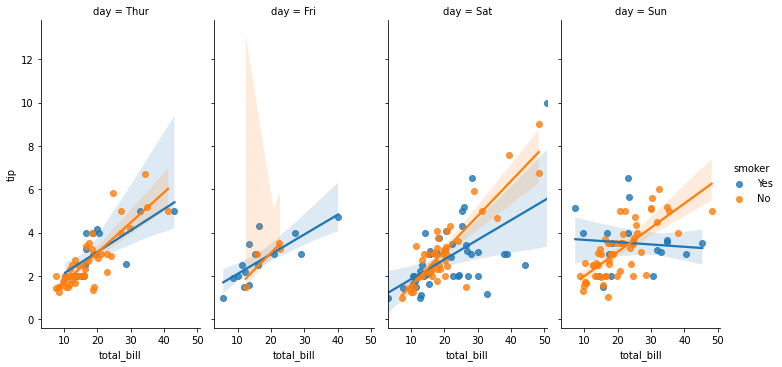

In [32]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", col="day", aspect= .5);

## <font color='yellow'> Gráficos para Variáveis Categóricas </font>

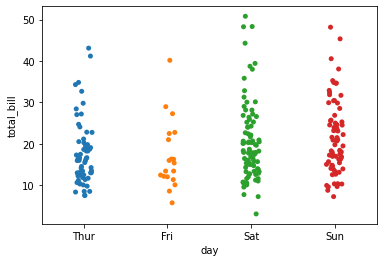

In [33]:
sns.stripplot(data=tips, x="day", y="total_bill");

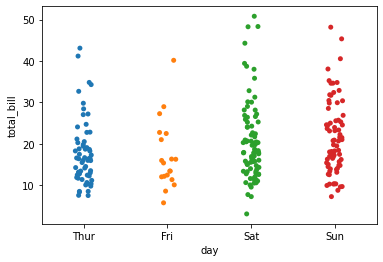

In [36]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter= True);
# jitte agrupa os pontos em um determivando intervalo

### Evitando o overlap dos pontos

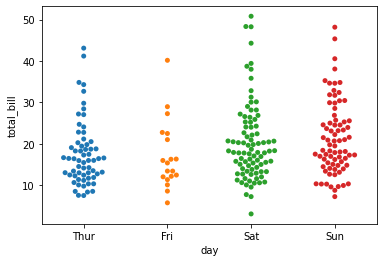

In [37]:
sns.swarmplot(data=tips, x='day', y='total_bill');

## <font color='yellow'> Boxplot </font>

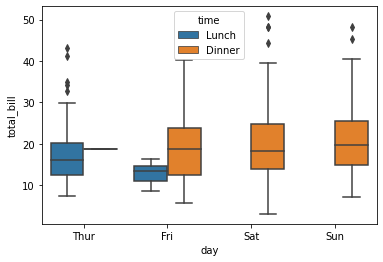

In [40]:
sns.boxplot(data=tips, x='day', y='total_bill',hue='time');
# hue seria uma classificacao

<AxesSubplot:>

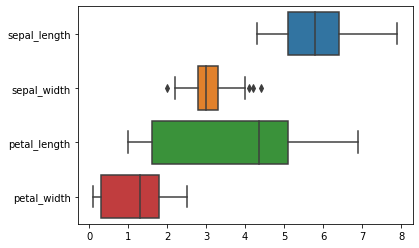

In [41]:
#horizontal
sns.boxplot(data = iris, orient='h')

## <font color='yellow'> Graficos de Barra </font>

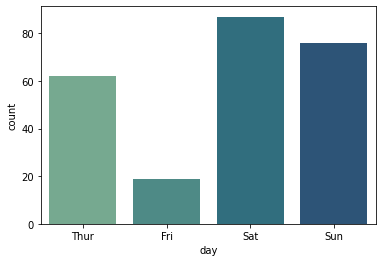

In [56]:
sns.countplot(data=tips, x='day', palette='crest');

<AxesSubplot:xlabel='count', ylabel='day'>

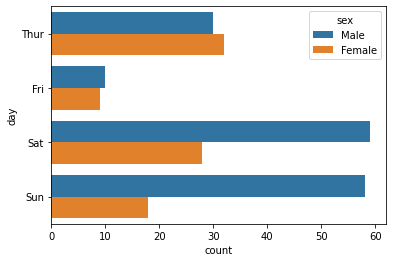

In [68]:
sns.countplot(data=tips, y='day', hue='sex')

<AxesSubplot:xlabel='count', ylabel='day'>

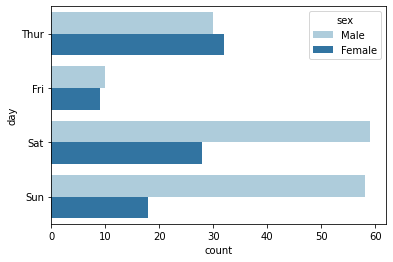

In [77]:
sns.countplot(data=tips, y='day', hue='sex', palette='Paired') 

<AxesSubplot:xlabel='count', ylabel='day'>

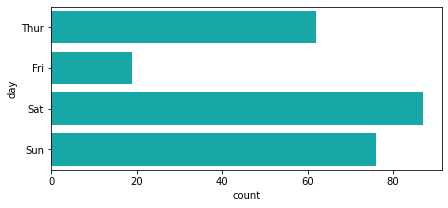

In [83]:
f, ax = plt.subplots(figsize=(7, 3)) # Modificando a area de plot do grafico
sns.countplot(data=tips, y='day', color='c')

## <font color='yellow'> Graficos de Pontos </font>

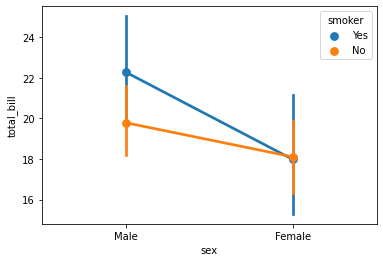

In [84]:
sns.pointplot(data=tips, x='sex', y='total_bill', hue='smoker');

### Distancia entre os pontos

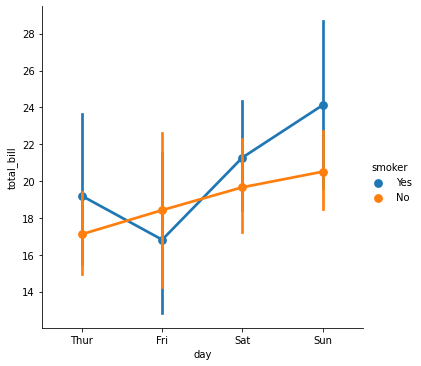

In [85]:
sns.factorplot(data=tips, x='day', y='total_bill', hue= 'smoker');